In [2]:
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66141,Zimbabwe,ZWE,2021-12-01,6640440.0,3809900.0,2830540.0,NaN,28498.0,21938.0,44.00,25.24,18.76,NaN,1454.0,12896.0,0.085
66142,Zimbabwe,ZWE,2021-12-02,6682111.0,3830488.0,2851623.0,NaN,41671.0,24152.0,44.28,25.38,18.89,NaN,1600.0,13167.0,0.087
66143,Zimbabwe,ZWE,2021-12-03,6710095.0,3845246.0,2864849.0,NaN,27984.0,23681.0,44.46,25.48,18.98,NaN,1569.0,12556.0,0.083
66144,Zimbabwe,ZWE,2021-12-04,6742193.0,3866139.0,2876054.0,NaN,32098.0,25964.0,44.67,25.62,19.06,NaN,1720.0,14392.0,0.095


In [4]:
df.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     28657
people_vaccinated                      30282
people_fully_vaccinated                33240
total_boosters                         57088
daily_vaccinations_raw                 34713
daily_vaccinations                       344
total_vaccinations_per_hundred         28657
people_vaccinated_per_hundred          30282
people_fully_vaccinated_per_hundred    33240
total_boosters_per_hundred             57088
daily_vaccinations_per_million           344
daily_people_vaccinated                 1590
daily_people_vaccinated_per_hundred     1590
dtype: int64

In [5]:
df.fillna(value=0, inplace=True)
date = df.date.str.split('-', expand=True)
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
66141,2021,12,01
66142,2021,12,02
66143,2021,12,03
66144,2021,12,04


In [6]:
df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

df.date = pd.to_datetime(df.date)

df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,2021,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66141,Zimbabwe,ZWE,2021-12-01,6640440.0,3809900.0,2830540.0,0.0,28498.0,21938.0,44.00,25.24,18.76,0.0,1454.0,12896.0,0.085,2021,12,1
66142,Zimbabwe,ZWE,2021-12-02,6682111.0,3830488.0,2851623.0,0.0,41671.0,24152.0,44.28,25.38,18.89,0.0,1600.0,13167.0,0.087,2021,12,2
66143,Zimbabwe,ZWE,2021-12-03,6710095.0,3845246.0,2864849.0,0.0,27984.0,23681.0,44.46,25.48,18.98,0.0,1569.0,12556.0,0.083,2021,12,3
66144,Zimbabwe,ZWE,2021-12-04,6742193.0,3866139.0,2876054.0,0.0,32098.0,25964.0,44.67,25.62,19.06,0.0,1720.0,14392.0,0.095,2021,12,4


In [18]:
numeric_col = df[['location','total_vaccinations','people_vaccinated', 'people_fully_vaccinated','total_boosters','daily_vaccinations_raw',
                 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred'
                 ,'total_boosters_per_hundred', 'daily_vaccinations_per_million', 'daily_people_vaccinated', 
                 'daily_people_vaccinated_per_hundred']]
vac_mean = numeric_col.groupby('location').mean()
vac_sum = numeric_col.groupby('location').sum()
vac_mean.min()

total_vaccinations                     4.094118
people_vaccinated                      2.764706
people_fully_vaccinated                1.329412
total_boosters                         0.000000
daily_vaccinations_raw                 0.000000
daily_vaccinations                     0.505882
total_vaccinations_per_hundred         0.002273
people_vaccinated_per_hundred          0.000682
people_fully_vaccinated_per_hundred    0.000909
total_boosters_per_hundred             0.000000
daily_vaccinations_per_million         3.295455
daily_people_vaccinated                0.000000
daily_people_vaccinated_per_hundred    0.000000
dtype: float64

In [19]:
vac_mean.max()

total_vaccinations                     2.925522e+09
people_vaccinated                      1.617023e+09
people_fully_vaccinated                1.046719e+09
total_boosters                         2.673463e+07
daily_vaccinations_raw                 2.219036e+07
daily_vaccinations                     2.193703e+07
total_vaccinations_per_hundred         1.207166e+02
people_vaccinated_per_hundred          5.761191e+01
people_fully_vaccinated_per_hundred    4.904164e+01
total_boosters_per_hundred             1.167827e+01
daily_vaccinations_per_million         3.579126e+04
daily_people_vaccinated                1.165921e+07
daily_people_vaccinated_per_hundred    2.113744e+00
dtype: float64

In [20]:
vac_sum.min()

total_vaccinations                     348.00
people_vaccinated                      235.00
people_fully_vaccinated                113.00
total_boosters                           0.00
daily_vaccinations_raw                   0.00
daily_vaccinations                      43.00
total_vaccinations_per_hundred           0.10
people_vaccinated_per_hundred            0.03
people_fully_vaccinated_per_hundred      0.04
total_boosters_per_hundred               0.00
daily_vaccinations_per_million         145.00
daily_people_vaccinated                  0.00
daily_people_vaccinated_per_hundred      0.00
dtype: float64

In [21]:
vac_sum.max()

total_vaccinations                     1.082443e+12
people_vaccinated                      5.982986e+11
people_fully_vaccinated                3.872860e+11
total_boosters                         9.891812e+09
daily_vaccinations_raw                 8.210434e+09
daily_vaccinations                     8.116700e+09
total_vaccinations_per_hundred         4.022636e+04
people_vaccinated_per_hundred          1.927605e+04
people_fully_vaccinated_per_hundred    1.683936e+04
total_boosters_per_hundred             4.110750e+03
daily_vaccinations_per_million         3.007716e+06
daily_people_vaccinated                4.313907e+09
daily_people_vaccinated_per_hundred    1.291950e+02
dtype: float64

total_vaccinations                     1.000
people_vaccinated                      1.000
people_fully_vaccinated                1.000
total_boosters                         1.000
daily_vaccinations_raw                 1.000
daily_vaccinations                     1.000
total_vaccinations_per_hundred         0.010
people_vaccinated_per_hundred          0.010
people_fully_vaccinated_per_hundred    0.010
total_boosters_per_hundred             0.010
daily_vaccinations_per_million         1.000
daily_people_vaccinated                1.000
daily_people_vaccinated_per_hundred    0.001
dtype: float64

Global Daily vaccination

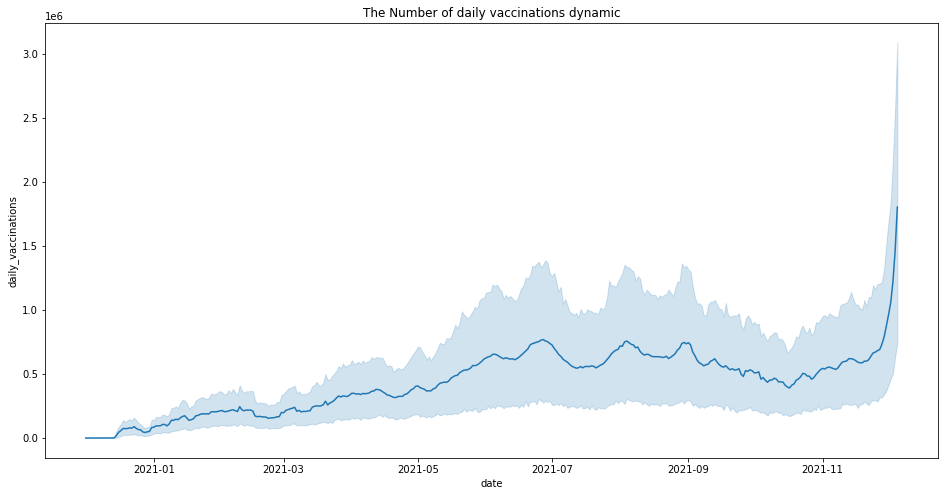

In [11]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df.date, y=df.daily_vaccinations)
plt.title('The Number of daily vaccinations dynamic')
plt.show()

In [14]:
countries = df.groupby('location')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= df.columns)
for country in countries:
    top_countries = top_countries.append(df.loc[df['location'] == country])

C:\Users\augus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


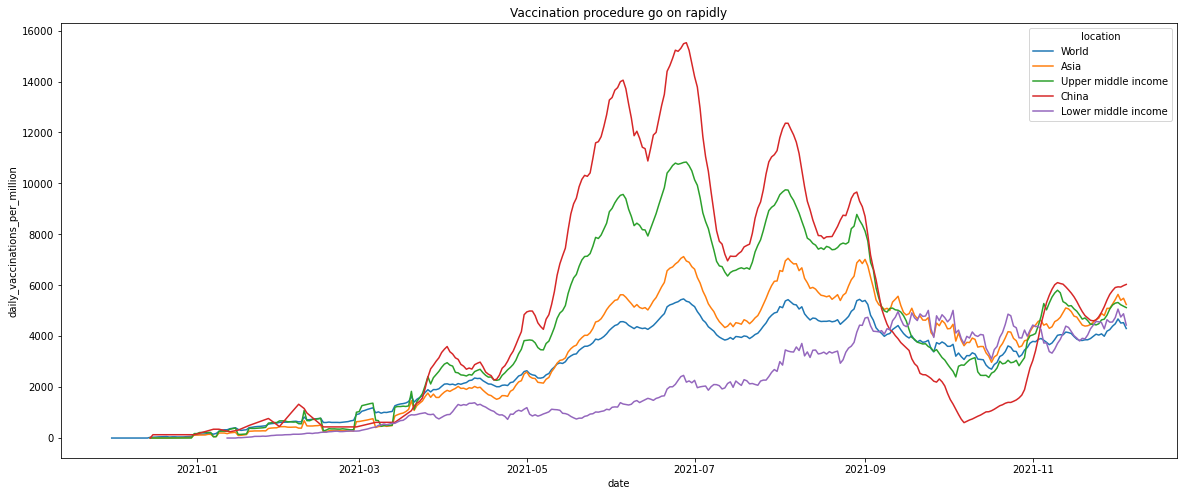

In [15]:
plt.figure(figsize=(20,8))
sns.lineplot(top_countries['date'], top_countries['daily_vaccinations_per_million'], hue= top_countries['location'], ci= False)
plt.title('Vaccination procedure go on rapidly');